# Part 1 : MAP

## Write a program in python to implement the MAP (or regularization) for polynomial curve fitting problem.  Follow the instructions below:

**1.Generate 50 2D-data points using the following function: y = sin(x^2+1)**

**2.Add Gaussian random noise to the data**

**3.Show the original curve line and the noisy data.**

In [171]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import linalg

In [172]:
def actual_distribution():
    x = np.linspace(0, 1, 50)

    y = np.sin(x**2 +1)
    
    return x, y

def add_noice(y_curve):
    mu = 0
    
    sigma = 0.05
    
    noise = np.random.normal(mu,sigma,len(y_curve))
    
    y_noice = y_curve + noise
    
    return y_noice
    
    

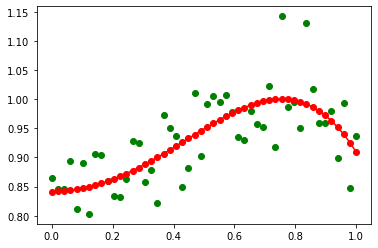

In [173]:
x_true, y_true = actual_distribution()

y_noise = add_noice(y_true)

plt.plot(x_true,y_true,'r',x_true,y_noise,'go')

plt.plot(x_true,y_true,'ro')


**4.Fit the generated noisy data using the MAP as discussed in class.**

In [174]:
from scipy import linalg
def my_MAP_fitting(x,y,M,alpha,beta):
    
    N = len(x)
    mx = np.zeros([N,M+1])
    vy = np.zeros([N,1])
    lamda_ = np.zeros([M+1,M+1])
    
    for n in range(0,N):
        for m in range(0,M+1):
            mx[n][m] = np.power(x[n],m)
        vy[n][0] = y[n]
    
    for n in range(M+1):
        for m in range(M+1):
            if n == m:
                lamda_[m][n] = alpha/beta
            else:
                lamda_[m][n] = 0
              
    mxx = np.dot(mx.T,mx)
    imxx = linalg.inv(mxx + lamda_) 
    tmp = np.dot(imxx, mx.T)
    w = np.dot(tmp, vy) 
       
    return w
    

In [175]:
def my_MAP_plot(x,w):
    M = len(w) - 1
    N = len(x)
    mx = np.zeros([N,M+1])
    
    for n in range(N):
        for m in range(M+1):
            mx[n][m] = np.power(x[n],m)
    
    y = np.dot(mx,w)
            
    return x,y

In [176]:
x_noise = x_true
w = my_MAP_fitting(x_noise, y_noise, M=10,alpha=0.4,beta=0.5)

In [177]:
x_curve = np.linspace(x_true[0],x_true[-1],50)
[x_est,y_est] = my_MAP_plot(x_curve,w)

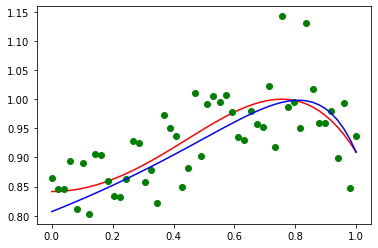

In [178]:
plt.plot(x_true,y_true,'r',x_true,y_noise,'go')
plt.plot(x_est,y_est,'b')

**5.Compute and display the total absolute error value (between the predicted and the correct ones) of using the computed w.**



In [179]:
error_sum = 0
for i in range(len(y_noise)):
    error = (y_est[i][0] - y_noise[i]) ** 2
    error_sum += error

error_sum = error_sum / 2
error_sum

0.07040997669883309

**6.Display the estimated values of w**

In [180]:
w

array([[ 0.80704044],
       [ 0.20841481],
       [ 0.07978678],
       [ 0.02526727],
       [-0.00323425],
       [-0.01959606],
       [-0.02947803],
       [-0.03559174],
       [-0.03935872],
       [-0.04157685],
       [-0.04272333]])

**7.Experiment with your code by changing M and alpha (the coefficient of the regularization/prior term) to various values, and then show the plots. On each the plot, you must show the values of M and alpha.**

Text(0.5, 1.0, 'M = 10, alpha = 0.1')

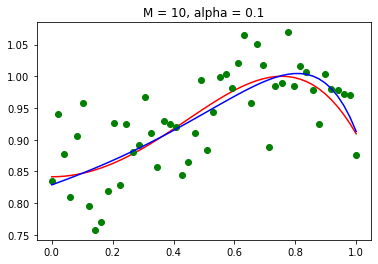

In [170]:
w = my_MAP_fitting(x_noise, y_noise, M=10,alpha=0.1,beta=0.5)
x_curve = np.linspace(x_true[0],x_true[-1],50)
[x_est,y_est] = my_MAP_plot(x_curve,w)
plt.plot(x_true,y_true,'r',x_true,y_noise,'go')
plt.plot(x_est,y_est,'b')
plt.title('M = 10, alpha = 0.1')

Text(0.5, 1.0, 'M = 10, alpha = 0.5')

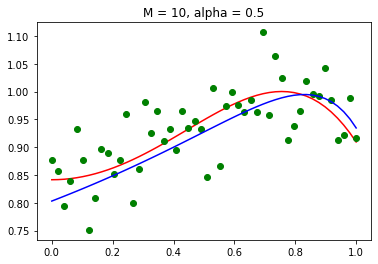

In [14]:
w = my_MAP_fitting(x_noise, y_noise, M=10,alpha=0.5,beta=0.5)
x_curve = np.linspace(x_true[0],x_true[-1],50)
[x_est,y_est] = my_MAP_plot(x_curve,w)
plt.plot(x_true,y_true,'r',x_true,y_noise,'go')
plt.plot(x_est,y_est,'b')
plt.title('M = 10, alpha = 0.5')

Text(0.5, 1.0, 'M = 10, alpha = 1')

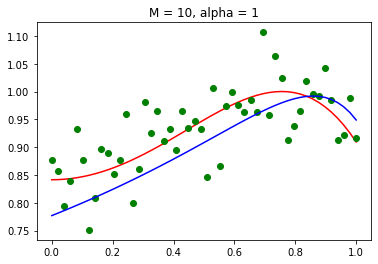

In [15]:
w = my_MAP_fitting(x_noise, y_noise, M=10,alpha=1,beta=0.5)
x_curve = np.linspace(x_true[0],x_true[-1],50)
[x_est,y_est] = my_MAP_plot(x_curve,w)
plt.plot(x_true,y_true,'r',x_true,y_noise,'go')
plt.plot(x_est,y_est,'b')
plt.title('M = 10, alpha = 1')

Text(0.5, 1.0, 'M = 50, alpha = 0.1')

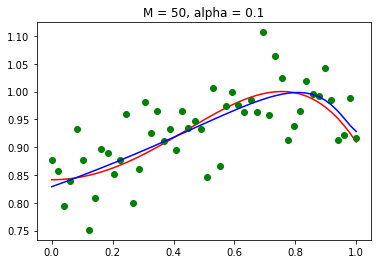

In [16]:
w = my_MAP_fitting(x_noise, y_noise, M=50,alpha=0.1,beta=0.5)
x_curve = np.linspace(x_true[0],x_true[-1],50)
[x_est,y_est] = my_MAP_plot(x_curve,w)
plt.plot(x_true,y_true,'r',x_true,y_noise,'go')
plt.plot(x_est,y_est,'b')
plt.title('M = 50, alpha = 0.1')

Text(0.5, 1.0, 'M = 50, alpha = 0.5')

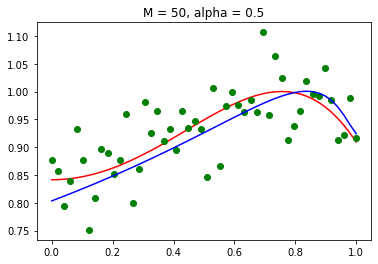

In [17]:
w = my_MAP_fitting(x_noise, y_noise, M=50,alpha=0.5,beta=0.5)
x_curve = np.linspace(x_true[0],x_true[-1],50)
[x_est,y_est] = my_MAP_plot(x_curve,w)
plt.plot(x_true,y_true,'r',x_true,y_noise,'go')
plt.plot(x_est,y_est,'b')
plt.title('M = 50, alpha = 0.5')

Text(0.5, 1.0, 'M = 50, alpha = 1')

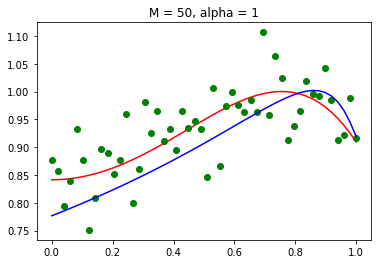

In [18]:
w = my_MAP_fitting(x_noise, y_noise, M=50,alpha=1,beta=0.5)
x_curve = np.linspace(x_true[0],x_true[-1],50)
[x_est,y_est] = my_MAP_plot(x_curve,w)
plt.plot(x_true,y_true,'r',x_true,y_noise,'go')
plt.plot(x_est,y_est,'b')
plt.title('M = 50, alpha = 1')

**8.From the experiment in 7, discuss how M and alpha influence on the fitting accuracy.**

When alpha is increasing, fitting accuracy is becoming worse.

When M is large, the overfitting problem is not obvious, meaning that M doesn't affect fitting accuracy much.

# Part 2: BASIS FUNCTION

## Write a program in python to implement the MLE that employs basis functions to solve the polynomial curve fitting problem. Follow the instructions below:

**1.Generate 50 2D-data points using the following function: y = sin(x^2+1)**

**2.Add Gaussian random noise to the data**

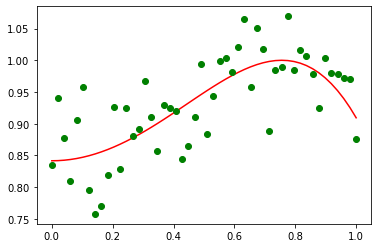

In [161]:
x_true, y_true = actual_distribution()

y_noise = add_noice(y_true)

plt.plot(x_true,y_true,'r',x_true,y_noise,'go')
#plt.plot(x_true,y_true,'ro')

**3.Fit the generated noisy data using the MLE that employs the Gaussian basis functions as discussed in class.**

In [162]:
def my_MLE_basic_fun_fitting(x,y,M):
    
    N = len(x)
    mx = np.zeros([N,1])
    vy = np.zeros([N,1])
    fi_square = np.zeros([N,M])
    
    for n in range(0,N):
        vy[n][0] = y[n]
        mx[n][0] = x[n]

    
    for n in range(N):
        for m in range(M):
            fi_square[n][m] = fi_fun(x[n],M,m)
            
    fi_square_T = fi_square.T
    fi_fi_T = np.dot(fi_square_T, fi_square)
    fi_1 = linalg.inv(fi_fi_T)
    final_fi = np.dot(fi_1, fi_square_T)
    w = np.dot(final_fi, vy)

    return w
    

In [163]:
import math
def fi_fun(xn,M,m):
    # m : fi_m (xn), the m th fi function ,the m th mu, naming mu[m]
    # mu_index :0 - M
    
    mu = np.linspace(0,1,M)
    sigma = 0.01
    
    item = -((xn - mu[m])**2 )/(2 * (sigma**2))
    result = math.exp(item)
    
    return result

In [164]:
def my_MLE_basic_fun_plot(x,w):
    M = len(w)
    N = len(x)
    mx = x.copy()
    vy = [0 for i in range(N)]
    for n in range(N):
        y_n = 0
        for m in range(M):
            y_n += w[m][0] * fi_fun(mx[n],M,m) 
        vy[n] = y_n

    return mx, vy

Text(0.5, 1.0, 'MLE using Basic function: M = 50')

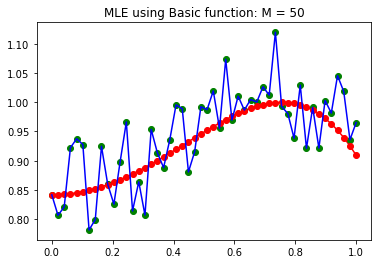

In [156]:
# sigma = 0.01
w = my_MLE_basic_fun_fitting(x_noise, y_noise, M=50)
x_curve = x_noise
[x_est,y_est] = my_MLE_basic_fun_plot(x_curve, w)
plt.plot(x_true,y_true,'r',x_true,y_noise,'go')
plt.plot(x_true,y_true,'ro')
plt.plot(x_est,y_est,'b')
plt.title('MLE using Basic function: M = 50')

4.Show your results for different values of M that generate overfitting and underfitting curves.

Text(0.5, 1.0, 'MLE using Basic function: M = 50')

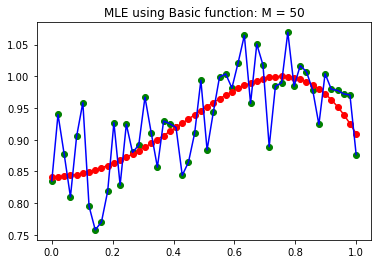

In [168]:
def fi_fun(xn,M,m):
    # m : fi_m (xn), the m th fi function ,the m th mu, naming mu[m]
    # mu_index :0 - M 
    mu = np.linspace(0,1,M)
    sigma = 0.01
    item = -((xn - mu[m])**2 )/(2 * (sigma**2))
    result = math.exp(item)
    
    return result
# sigma = 0.01
w = my_MLE_basic_fun_fitting(x_noise, y_noise, M=50)
x_curve = x_noise
[x_est,y_est] = my_MLE_basic_fun_plot(x_curve, w)
plt.plot(x_true,y_true,'r',x_true,y_noise,'go')
plt.plot(x_true,y_true,'ro')
plt.plot(x_est,y_est,'b')
plt.title('MLE using Basic function: M = 50')

Text(0.5, 1.0, 'MLE using Basic function: M =2 ')

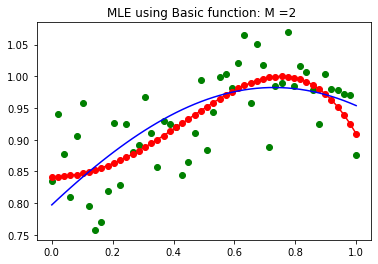

In [167]:
# sigma = 1
def fi_fun(xn,M,m):
    # m : fi_m (xn), the m th fi function ,the m th mu, naming mu[m]
    # mu_index :0 - M   
    mu = np.linspace(0,1,M)
    sigma = 1
    
    item = -((xn - mu[m])**2 )/(2 * (sigma**2))
    result = math.exp(item)
    
    return result

w = my_MLE_basic_fun_fitting(x_noise, y_noise, M=2)
x_curve = x_noise
[x_est,y_est] = my_MLE_basic_fun_plot(x_curve, w)
plt.plot(x_true,y_true,'r',x_true,y_noise,'go')
plt.plot(x_true,y_true,'ro')
plt.plot(x_est,y_est,'b')
plt.title('MLE using Basic function: M =2 ')

**5.Change the basis functions to the sigmoid basis functions, and show the results for different values of M that generate overfitting and underfitting curves.**

In [26]:
def sigmoid_fun(xn,M,m):
    mu = np.linspace(0, 1, M)
    sigma = 0.01
    a = (xn - mu[m])/sigma
    result = 1/(1 + math.exp(-a))
    
    return result

In [27]:
def my_MLE_basic_fun_fitting_sig(x,y,M):
    
    N = len(x)
    mx = np.zeros([N,1])
    vy = np.zeros([N,1])
    fi_square = np.zeros([N,M])
    
    for n in range(0,N):
        vy[n][0] = y[n]
        mx[n][0] = x[n]

    
    for n in range(N):
        for m in range(M):
            fi_square[n][m] =sigmoid_fun(x[n],M,m)
            
    fi_square_T = fi_square.T
    fi_fi_T = np.dot(fi_square_T, fi_square)
    fi_1 = linalg.inv(fi_fi_T)
    final_fi = np.dot(fi_1, fi_square_T)
    w = np.dot(final_fi, vy)

    return w

In [28]:
def my_MLE_basic_fun_plot_sig(x,w):
    M = len(w)
    N = len(x)
    mx = x.copy()
    vy = [0 for i in range(N)]
    for n in range(N):
        y_n = 0
        for m in range(M):
            y_n += w[m][0] * sigmoid_fun(mx[n],M,m) 
        vy[n] = y_n

    return mx, vy

Text(0.5, 1.0, 'MLE using Basic function(sigmoid): M = 50')

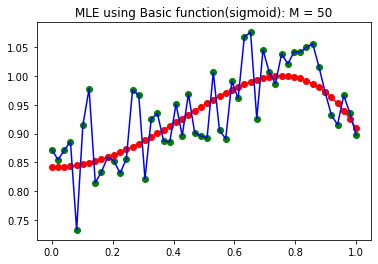

In [29]:
# sigma = 0.01
def sigmoid_fun(xn,M,m):
    mu = np.linspace(0, 1, M)
    sigma = 0.01
    a = (xn - mu[m])/sigma
    result = 1/(1 + math.exp(-a))
    
    return result
w = my_MLE_basic_fun_fitting_sig(x_noise, y_noise, M=50)
x_curve = x_noise
[x_est,y_est] = my_MLE_basic_fun_plot_sig(x_curve, w)
plt.plot(x_true,y_true,'r',x_true,y_noise,'go')
plt.plot(x_true,y_true,'ro')
plt.plot(x_est,y_est,'b')
plt.title('MLE using Basic function(sigmoid): M = 50')

Text(0.5, 1.0, 'MLE using Basic function(sigmoid): M = 2')

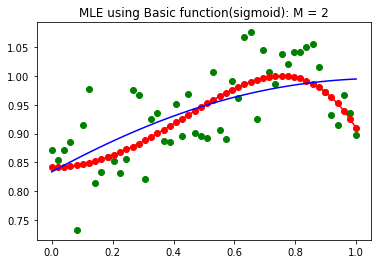

In [30]:
# sigma = 1
def sigmoid_fun(xn,M,m):
    mu = np.linspace(0, 1, M)
    sigma = 1
    a = (xn - mu[m])/sigma
    result = 1/(1 + math.exp(-a))
    
    return result

w = my_MLE_basic_fun_fitting_sig(x_noise, y_noise, M=2)
x_curve = x_noise
[x_est,y_est] = my_MLE_basic_fun_plot_sig(x_curve, w)
plt.plot(x_true,y_true,'r',x_true,y_noise,'go')
plt.plot(x_true,y_true,'ro')
plt.plot(x_est,y_est,'b')
plt.title('MLE using Basic function(sigmoid): M = 2')

**6.Change the original curve function to y = 0.4345 x^3 - 5.607 x^2 + 16.78 x - 10.61 , and use the sigmoid basis function to estimate the best curve fitting from the noisy data.**

In [186]:
x_true = np.linspace(0, 9, 50)

y_true = 0.4345 * x_true ** 3 - 5.607 * x_true ** 2 + 16.78 * x_true - 10.61  

In [187]:
def add_noice(y_curve):
    mu = 0  
    sigma = 5  
    noise = np.random.normal(mu,sigma,len(y_curve)) 
    y_noice = y_curve + noise
    
    return y_noice

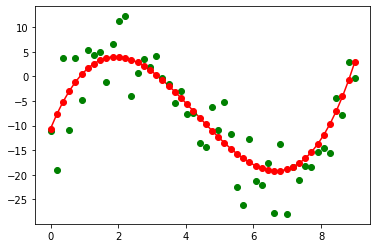

In [188]:
x_noise = x_true

y_noise = add_noice(y_true)

plt.plot(x_true,y_true,'r',x_true,y_noise,'go')

plt.plot(x_true,y_true,'ro')


Text(0.5, 1.0, 'MLE using Basic function(sigmoid): M = 5  S = 3')

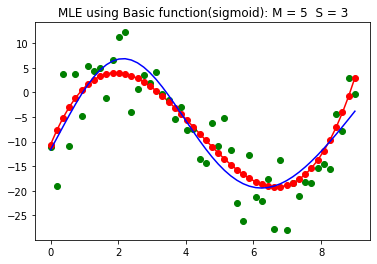

In [206]:
# M =5 sigma = 3
def sigmoid_fun(xn,M,m):
    mu = np.linspace(0, 1, M)
    sigma = 3
    a = (xn - mu[m])/sigma
    result = 1/(1 + math.exp(-a))
    
    return result

w = my_MLE_basic_fun_fitting_sig(x_noise, y_noise, M=5)
x_curve = x_noise
[x_est,y_est] = my_MLE_basic_fun_plot_sig(x_curve, w)
plt.plot(x_true,y_true,'r',x_true,y_noise,'go')
plt.plot(x_true,y_true,'ro')
plt.plot(x_est,y_est,'b')
plt.title('MLE using Basic function(sigmoid): M = 5  S = 3')


**7.Experiment with different parameters of the Gaussian and sigmoid basis functions, and then show the plot. Also, discuss the advantages of these basis functions over polynomial functions.**

Advantages of these basis functions over polynomial functions:
1.  For the polynomial function, the  data x with bigger exponent will dominate the data ,making the fitting curve too simple. For basic function, each function has the fixed value range, thus solving that problem.
2. By using basic function, it's easy to process data x with high dimensional.

Text(0.5, 1.0, 'MLE using Basic function(sigmoid): M = 5  S = 2 ')

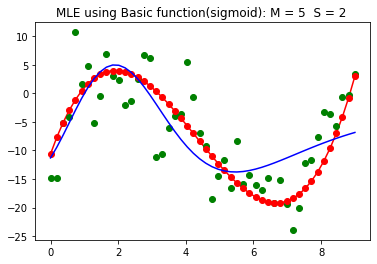

In [35]:
# M = 5 sigma = 2
def sigmoid_fun(xn,M,m):
    mu = np.linspace(0, 1, M)
    sigma = 2
    a = (xn - mu[m])/sigma
    result = 1/(1 + math.exp(-a))
    
    return result

w = my_MLE_basic_fun_fitting_sig(x_noise, y_noise, M=5)
x_curve = x_noise
[x_est,y_est] = my_MLE_basic_fun_plot_sig(x_curve, w)
plt.plot(x_true,y_true,'r',x_true,y_noise,'go')
plt.plot(x_true,y_true,'ro')
plt.plot(x_est,y_est,'b')
plt.title('MLE using Basic function(sigmoid): M = 5  S = 2 ')

Text(0.5, 1.0, 'MLE using Basic function(sigmoid): M = 5  S = 10')

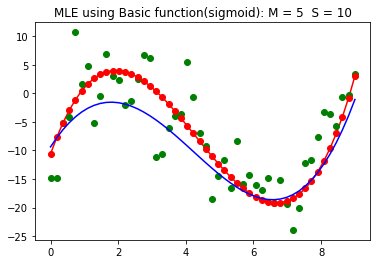

In [36]:
# M = 5 sigma = 10
def sigmoid_fun(xn,M,m):
    mu = np.linspace(0, 1, M)
    sigma = 10
    a = (xn - mu[m])/sigma
    result = 1/(1 + math.exp(-a))
    
    return result

w = my_MLE_basic_fun_fitting_sig(x_noise, y_noise, M=5)
x_curve = x_noise
[x_est,y_est] = my_MLE_basic_fun_plot_sig(x_curve, w)
plt.plot(x_true,y_true,'r',x_true,y_noise,'go')
plt.plot(x_true,y_true,'ro')
plt.plot(x_est,y_est,'b')
plt.title('MLE using Basic function(sigmoid): M = 5  S = 10')

Text(0.5, 1.0, 'MLE using Basic function: M = 4 S = 3')

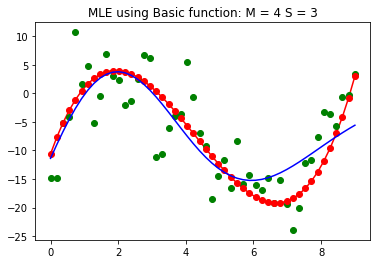

In [37]:
# M = 4  S = 3
def fi_fun(xn,M,m):
    # m : fi_m (xn), the m th fi function ,the m th mu, naming mu[m]
    # mu_index :0 - M
    mu = np.linspace(0,1,M)
    sigma = 3
    item = -((xn - mu[m])**2 )/(2 * (sigma**2))
    result = math.exp(item)
    
    return result

w = my_MLE_basic_fun_fitting(x_noise, y_noise, M=4)
x_curve = x_noise
[x_est,y_est] = my_MLE_basic_fun_plot(x_curve, w)
plt.plot(x_true,y_true,'r',x_true,y_noise,'go')
plt.plot(x_true,y_true,'ro')
plt.plot(x_est,y_est,'b')
plt.title('MLE using Basic function: M = 4 S = 3')


Text(0.5, 1.0, 'MLE using Basic function: M = 4 S = 2')

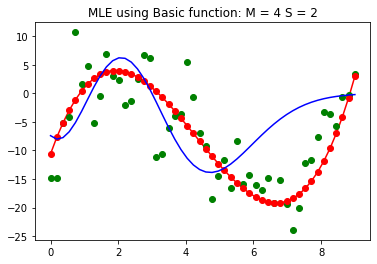

In [38]:
# M = 4  S = 2
def fi_fun(xn,M,m):
    # m : fi_m (xn), the m th fi function ,the m th mu, naming mu[m]
    # mu_index :0 - M
    mu = np.linspace(0,1,M)
    sigma = 2
    item = -((xn - mu[m])**2 )/(2 * (sigma**2))
    result = math.exp(item)
    
    return result

w = my_MLE_basic_fun_fitting(x_noise, y_noise, M=4)
x_curve = x_noise
[x_est,y_est] = my_MLE_basic_fun_plot(x_curve, w)
plt.plot(x_true,y_true,'r',x_true,y_noise,'go')
plt.plot(x_true,y_true,'ro')
plt.plot(x_est,y_est,'b')
plt.title('MLE using Basic function: M = 4 S = 2')


Text(0.5, 1.0, 'MLE using Basic function: M = 4 S = 6')

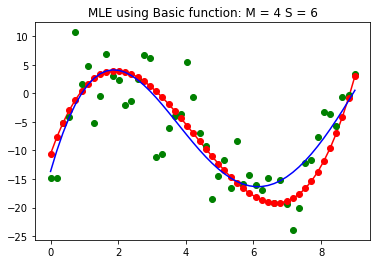

In [39]:
# M = 4  S = 6
def fi_fun(xn,M,m):
    # m : fi_m (xn), the m th fi function ,the m th mu, naming mu[m]
    # mu_index :0 - M
    mu = np.linspace(0,1,M)
    sigma = 6
    item = -((xn - mu[m])**2 )/(2 * (sigma**2))
    result = math.exp(item)
    
    return result

w = my_MLE_basic_fun_fitting(x_noise, y_noise, M=4)
x_curve = x_noise
[x_est,y_est] = my_MLE_basic_fun_plot(x_curve, w)
plt.plot(x_true,y_true,'r',x_true,y_noise,'go')
plt.plot(x_true,y_true,'ro')
plt.plot(x_est,y_est,'b')
plt.title('MLE using Basic function: M = 4 S = 6')


# Part 3: FULL BAYESIAN + PREDICTIVE DISTRIBUTION

## Write a program in python to implement the full Bayesian inference on Gaussian variables for curve fitting problem. Follow the instructions below:

**1.Generate 50 2D-data points using the following function: y = sin(x^2+1)  . Add Gaussian random noise to the data. Show the original curve line and the noisy data.**

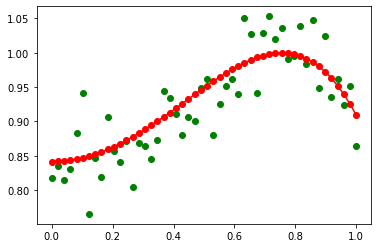

In [40]:
def actual_distribution():
    x = np.linspace(0, 1, 50)
    y = np.sin(x**2 +1)
    
    return x, y

def add_noice(y_curve):
    mu = 0    
    sigma = 0.05    
    noise = np.random.normal(mu,sigma,len(y_curve))   
    y_noice = y_curve + noise
    
    return y_noice

x_true, y_true = actual_distribution()
x_noise = y_noise
y_noise = add_noice(y_true)
plt.plot(x_true,y_true,'r',x_true,y_noise,'go')
plt.plot(x_true,y_true,'ro')

**2.Compute w based on the full Bayesian inference (by using basis functions like discussed in class). Display the estimated values of w.**

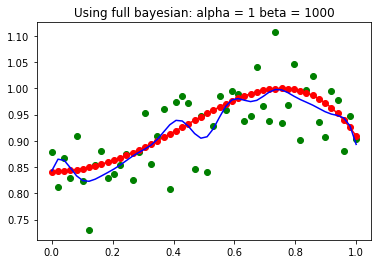

In [135]:
def actual_distribution():
    x = np.linspace(0, 1, 50)
    y = np.sin(x ** 2 + 1)
    return x, y

def add_noice(y_curve):
    mu = 0
    sigma = 0.05
    noise = np.random.normal(mu, sigma, len(y_curve))
    y_noice = y_curve + noise

    return y_noice

x_true, y_true = actual_distribution()
x_noise = x_true
y_noise = add_noice(y_true)


def my_full_Bayesian_inference_fitting(x, y, M, alpha, beta):

    N = len(x)
    mx = np.zeros([N, 1])
    vy = np.zeros([N, 1])
    fi_square = np.zeros([N, M])
    alpha_square = np.zeros([M,M])
    row, col = np.diag_indices_from(alpha_square)
    alpha_square[row, col] = alpha

    for n in range(0, N):
        vy[n][0] = y[n]
        mx[n][0] = x[n]

    for n in range(N):
        for m in range(M):
            fi_square[n][m] = fi_fun(x[n],M,m)

    fi_square_T = fi_square.T
    fi_square_T_fi = np.dot(fi_square_T,fi_square)
    S_ = alpha_square + beta * fi_square_T_fi
    S = beta *  linalg.inv(S_)
    a = np.dot(fi_square_T , vy)
    w = np.dot(S,a)

    return w, fi_square


def fi_fun(xn, M, m):
    # m : fi_m (xn), the m th fi function ,the m th mu, naming mu[m]
    # mu_index :0 - M

    mu = np.linspace(0, 1, M)
    sigma = 0.08

    item = -((xn - mu[m]) ** 2) / (2 * (sigma ** 2))
    result = math.exp(item)

    return result


def my_MLE_basic_fun_plot(x, w, fi_square):
    M = len(w)
    N = len(x)
    mx = x.copy()
    # vy = [0 for i in range(N)]
#     vy = np.array(vy)
    vy = np.dot(fi_square, w)
#     for n in range(N):
#         y_n = 0
#         for m in range(M):
#             y_n += w[m][0] * fi_fun(mx[n],M,m)
#         vy[n] = y_n

    return mx, vy


w, fi_square = my_full_Bayesian_inference_fitting(x_noise, y_noise, M = 50 , alpha = 1, beta = 1000)
[x_est,y_est] = my_MLE_basic_fun_plot(x_noise, w, fi_square)
plt.plot(x_true,y_true,'r',x_true,y_noise,'go')
plt.plot(x_true,y_true,'ro')
plt.plot(x_est,y_est,'b')
plt.title('Using full bayesian: alpha = 1 beta = 1000')
plt.show()

In [133]:
w

array([[ 6.14111912e-01],
       [ 3.98744847e-02],
       [-1.13856191e-01],
       [ 1.67398783e-02],
       [ 1.90814467e-01],
       [ 2.19289046e-01],
       [ 7.96894841e-02],
       [-9.01733892e-02],
       [-1.17072598e-01],
       [ 5.47556130e-02],
       [ 3.02266954e-01],
       [ 4.12401048e-01],
       [ 2.61872258e-01],
       [-5.81286280e-02],
       [-2.92276920e-01],
       [-2.27329341e-01],
       [ 1.11002274e-01],
       [ 4.52499080e-01],
       [ 4.98912942e-01],
       [ 1.90699723e-01],
       [-2.16522018e-01],
       [-3.57974166e-01],
       [-8.72355540e-02],
       [ 3.67965495e-01],
       [ 5.86725664e-01],
       [ 3.37712517e-01],
       [-1.79709023e-01],
       [-4.83847062e-01],
       [-2.48583308e-01],
       [ 3.62879256e-01],
       [ 8.04698069e-01],
       [ 6.36289172e-01],
       [-4.65454560e-02],
       [-6.58200832e-01],
       [-6.37110569e-01],
       [ 3.36212693e-02],
       [ 7.87598359e-01],
       [ 9.69292898e-01],
       [ 4.1

**3.Experiment with your code by changing alpha and beta. Discuss the meaning of them with respect to the curve fitting results.**

Alpha is the variance of Gaussian prior and beta is the variance of Gaussian likelihood. The alpha/beta ratio desctibes how the curve fits. The larger the alpha/beta ratio, the poorer the fitting. The smaller the alpha/beta ratio, the better the fitting.


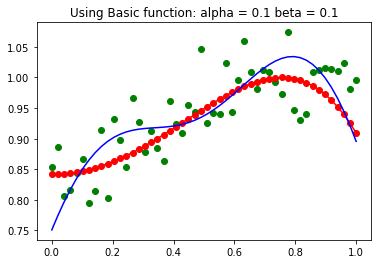

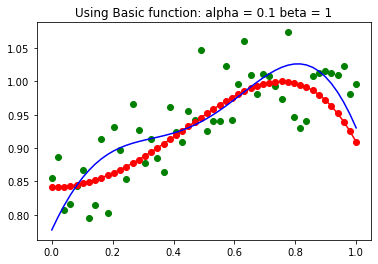

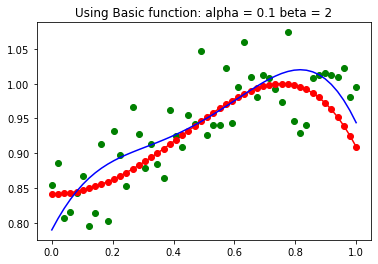

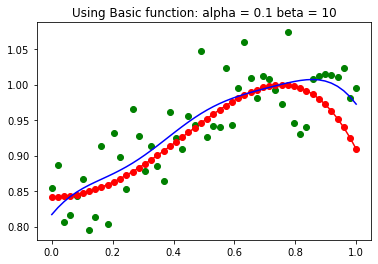

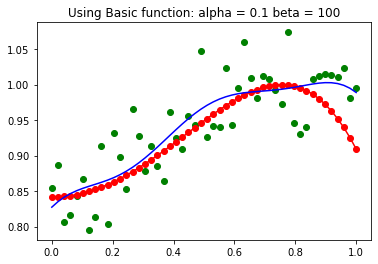

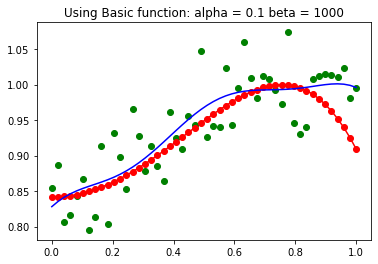

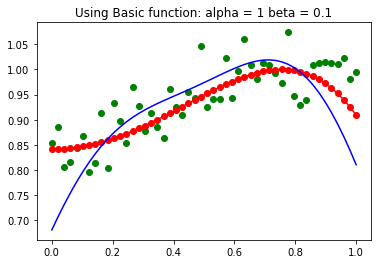

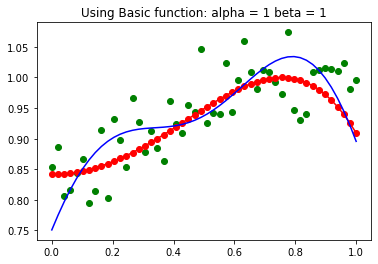

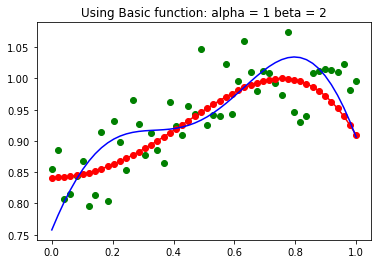

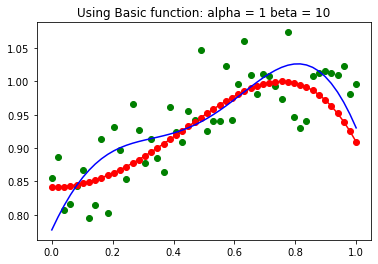

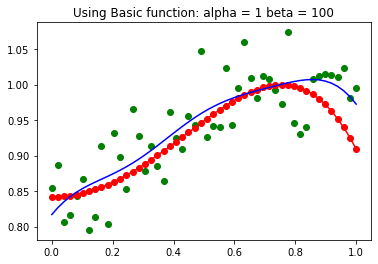

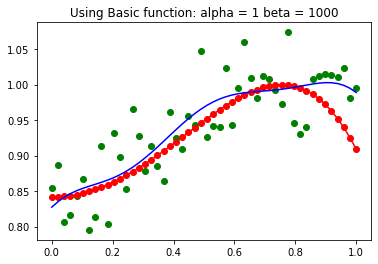

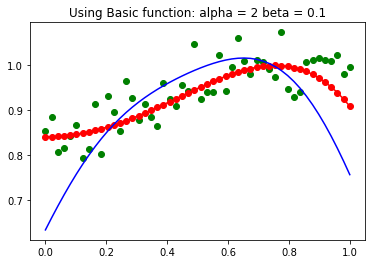

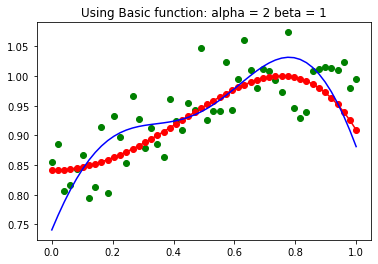

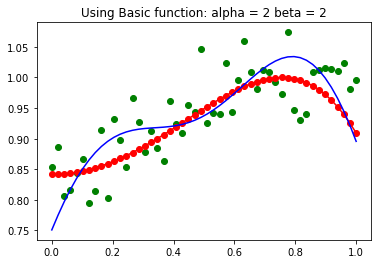

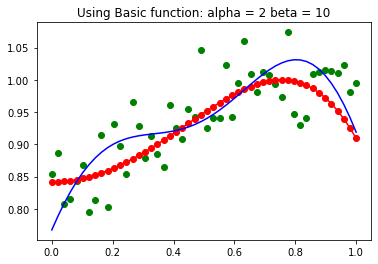

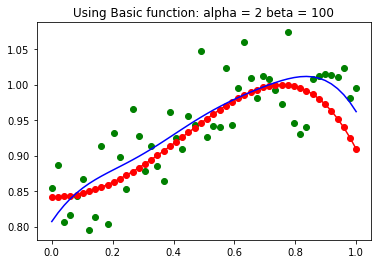

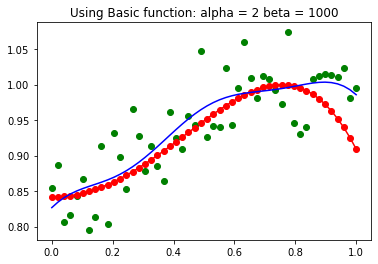

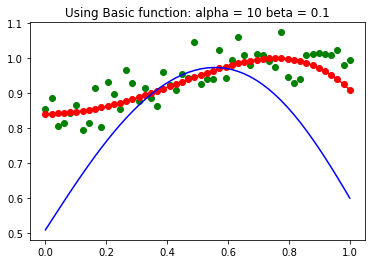

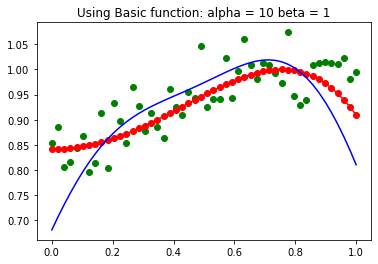

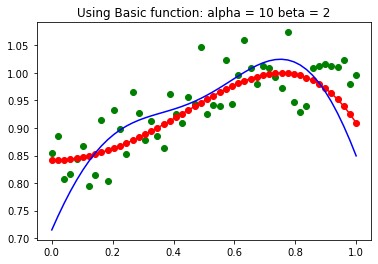

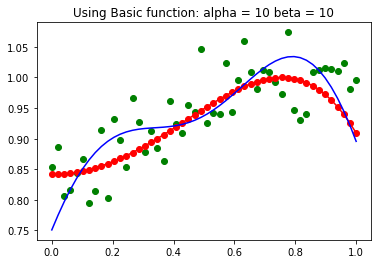

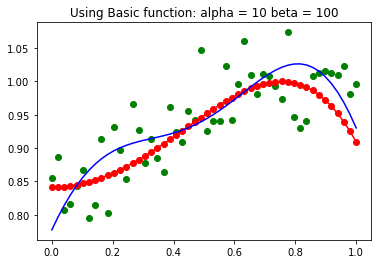

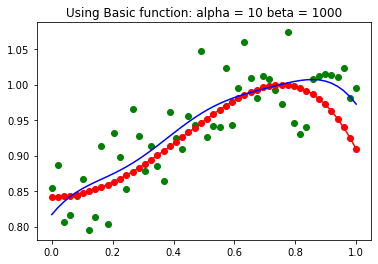

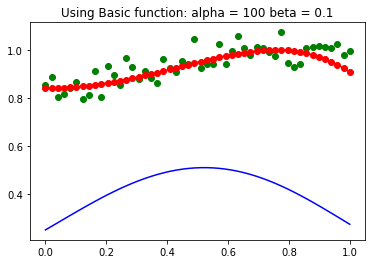

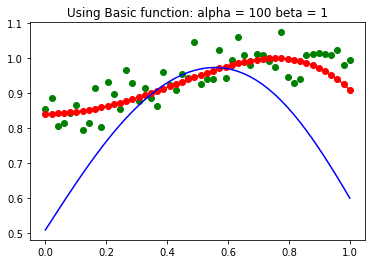

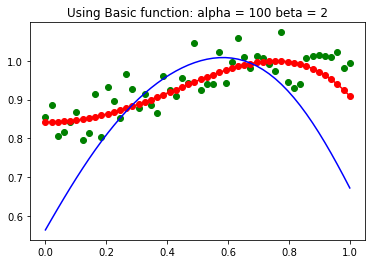

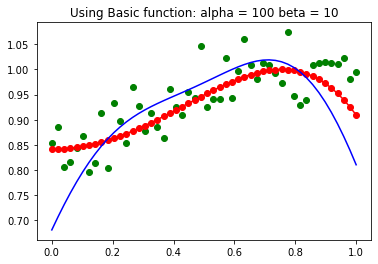

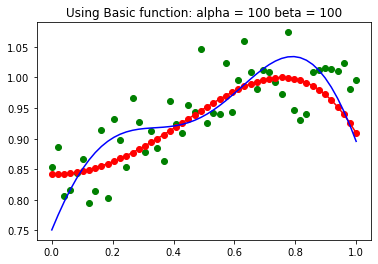

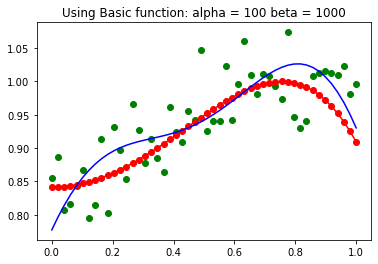

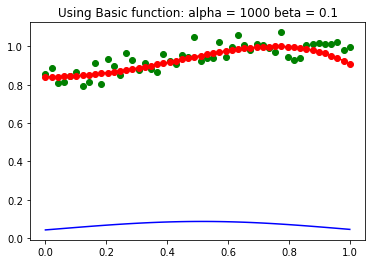

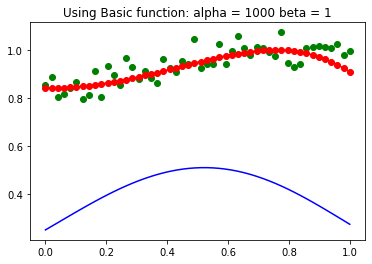

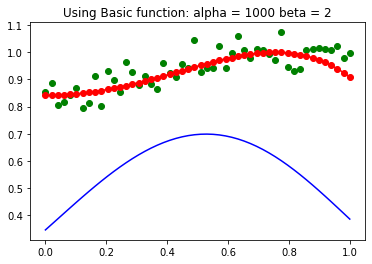

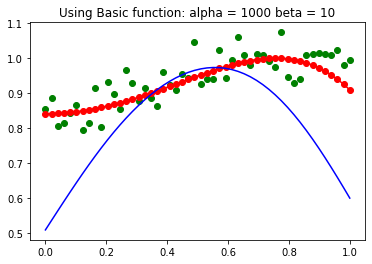

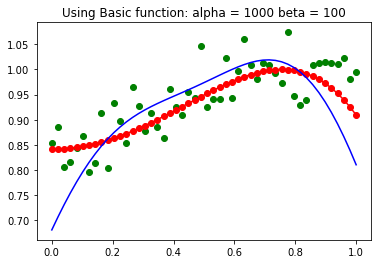

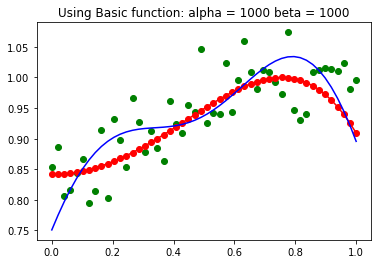

In [98]:
alpha_list = [0.1 ,1, 2 ,10, 100,1000 ]
beta_list = [0.1 ,1, 2 ,10, 100 ,1000]

for alpha_ in alpha_list:
    for beta_ in beta_list:
        w, fi_square = my_full_Bayesian_inference_fitting(x_noise, y_noise, M = 50 , alpha = alpha_, beta = beta_)
        [x_est,y_est] = my_MLE_basic_fun_plot(x_noise, w, fi_square)
        plt.plot(x_true,y_true,'r',x_true,y_noise,'go')
        plt.plot(x_true,y_true,'ro')
        plt.plot(x_est,y_est,'b')
        plt.title('Using Basic function: alpha = {} beta = {}'.format(alpha_, beta_))
        plt.show()

**4.Show your best fitting, similar to:**

In [44]:
def full_Bayesian_g(x, y, M, alpha, beta, sigma):

    N = len(x)
    mx = np.zeros([N, 1])
    vy = np.zeros([N, 1])
    fi_square = np.zeros([N, M])
    
    alpha_square = np.zeros([M,M])
    row, col = np.diag_indices_from(alpha_square)
    alpha_square[row, col] = alpha

    for n in range(0, N):
        vy[n][0] = y[n]
        mx[n][0] = x[n]

    for n in range(N):
        for m in range(M):
            fi_square[n][m] = fi_fun(x[n],M, m)


    fi_square_T = fi_square.T
    fi_square_T_fi = np.dot(fi_square_T,fi_square)
    S_ = alpha_square + beta * fi_square_T_fi
    S = beta *  linalg.inv(S_)
    a = np.dot(fi_square_T , vy)
    w = np.dot(S,a)
    
    S_N = linalg.inv(S_)
    m_N = beta * np.dot(S_N,a)
    
    
    y_estimate = np.dot(w.T, fi_square)
    e = y - y_estimate
    e_2 = 0
    for i in range(len(e)):
        e_2 += e[0][i]
    w_2 = np.dot(w.T,w)
    
    ln_g = (- beta/2) * e_2 - (alpha/2)*w_2
    
    return ln_g[0][0]



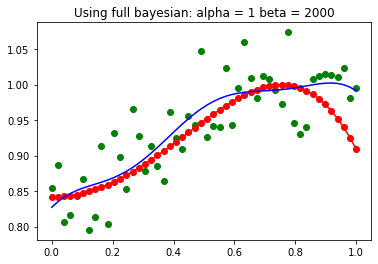

In [97]:
def fi_fun(xn, M, m):
    # m : fi_m (xn), the m th fi function ,the m th mu, naming mu[m]
    # mu_index :0 - M

    mu = np.linspace(0, 1, M)
    sigma = 0.3

    item = -((xn - mu[m]) ** 2) / (2 * (sigma ** 2))
    result = math.exp(item)

    return result
w, fi_square = my_full_Bayesian_inference_fitting(x_noise, y_noise, M = 50 , alpha =1, beta = 2000)
[x_est,y_est] = my_MLE_basic_fun_plot(x_noise, w, fi_square)
plt.plot(x_true,y_true,'r',x_true,y_noise,'go')
plt.plot(x_true,y_true,'ro')
plt.plot(x_est,y_est,'b')
plt.title('Using full bayesian: alpha = 1 beta = 2000')
plt.show()

**5.Explain how useful p(w|t) for the training and testing stages.**

In training stage, p(w | t) provides the information of uncertainty, describing how certain the predicted w is.

In testing stage, p(t_new | t) = p(t_new | w) * p(w | t), it provides the information of uncertainty, describing how certain the predicted t_new is.

In general, these probability information provided by  p(w | t) can help us choose the predicted result of higher certainty, thus making a better decision.

**6.Generate 50 2D-data points using the following function:y = sin(x^2+1) . Add Gaussian random noise to the data. Show the original curve line and the noisy data.**



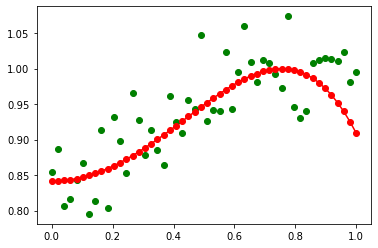

In [48]:
def actual_distribution():
    x = np.linspace(0, 1, 50)
    y = np.sin(x**2 +1)
    
    return x, y

def add_noice(y_curve):
    mu = 0    
    sigma = 0.05    
    noise = np.random.normal(mu,sigma,len(y_curve))   
    y_noice = y_curve + noise
    
    return y_noice

x_true, y_true = actual_distribution()
x_noise = x_true
y_noise = add_noice(y_true)
plt.plot(x_true,y_true,'r',x_true,y_noise,'go')
plt.plot(x_true,y_true,'ro')

**7.Compute the predictive distribution of every input data sequentially, where each input data is taken randomly from the noise data. Show your best prediction results for all 50 data one by one:**

In [49]:
# index = [ 11 ]  第十一个点， len = 1 有一个点
# index = [ 11，47 ]  第十一个点，第四十七个点， len = 2 有一两点
def fi_fun(xn, M, m):
    mu = np.linspace(0, 1, M)
    sigma = 0.08
    item = -((xn - mu[m]) ** 2) / (2 * (sigma ** 2))
    result = math.exp(item)

    return result
def my_full_Bayesian_predictive(x_select,x, y, M, alpha, beta):

    N = len(x_select)
    mx = np.zeros([N, 1])
    vy = np.zeros([N, 1])
    fi_square = np.zeros([N, M])
    alpha_square = np.zeros([M,M])
    row, col = np.diag_indices_from(alpha_square)
    alpha_square[row, col] = alpha

    for n in range(0, N):
        vy[n][0] = y[n]
        mx[n][0] = x_select[n]

    for n in range(N):
        for m in range(M):
            fi_square[n][m] = fi_fun(x_select[n],M,m)

    fi_square_T = fi_square.T
    fi_square_T_fi = np.dot(fi_square_T,fi_square)
    S_ = alpha_square + beta * fi_square_T_fi
    S_beta = beta *  linalg.inv(S_)
    a = np.dot(fi_square_T , vy)

    #training
    m_N = np.dot(S_beta,a) #均值
    S_N = linalg.inv(S_)  # 方差

    #testing
    fi_x_list = np.zeros([M,1])
    len_all = len(x)
    mu_list = np.zeros([1,len_all])
    sigma_list = np.zeros([1,len_all])
    for i in range(len_all):
        for m in range(M):
            fi_x_list[m][0] = fi_fun(x[i],M,m)
        mu = np.dot(m_N.T,fi_x_list)
        sigma_1 = np.dot(fi_x_list.T,S_N)
        sigma_2 = 1/beta + np.dot(sigma_1, fi_x_list)
        sigma = math.sqrt(sigma_2)
#         sigma /=15
        mu_list[0][i] = mu
        sigma_list[0][i] = sigma

    return mu_list,sigma_list


In [104]:
x_ = np.zeros([1,len(index)])
x_[0]

array([0., 0.])

In [105]:
x_noise

array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
       0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
       0.20408163, 0.2244898 , 0.24489796, 0.26530612, 0.28571429,
       0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
       0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
       0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
       0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
       0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
       0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
       0.91836735, 0.93877551, 0.95918367, 0.97959184, 1.        ])

[34]
[50, 8]
[42, 20, 31]
[42, 4, 15, 33]
[9, 43, 31, 19, 42]
[19, 17, 43, 3, 27, 15]
[12, 25, 16, 46, 47, 36, 19]
[37, 36, 21, 49, 30, 10, 35, 26]
[9, 43, 23, 1, 45, 20, 2, 14, 36]
[50, 17, 21, 43, 30, 48, 2, 44, 35, 13]
[38, 44, 34, 21, 17, 15, 35, 39, 20, 16, 11]
[8, 26, 30, 12, 42, 3, 48, 25, 37, 15, 21, 9]
[33, 13, 6, 39, 34, 10, 1, 12, 22, 20, 19, 15, 37]
[43, 21, 37, 7, 31, 50, 9, 27, 33, 8, 24, 46, 26, 4]
[45, 25, 23, 2, 48, 4, 30, 38, 34, 27, 16, 46, 7, 47, 42]
[31, 23, 44, 39, 8, 42, 11, 15, 30, 25, 27, 46, 48, 7, 40, 37]
[48, 26, 47, 8, 20, 49, 7, 19, 31, 28, 43, 30, 46, 13, 16, 10, 17]
[15, 13, 12, 23, 41, 27, 42, 1, 7, 20, 39, 33, 35, 11, 48, 45, 5, 3]
[30, 39, 16, 6, 45, 4, 22, 29, 12, 21, 24, 32, 13, 31, 19, 43, 28, 40, 34]
[19, 27, 33, 4, 13, 23, 37, 35, 34, 48, 1, 7, 5, 39, 50, 12, 14, 36, 30, 38]


C:\Users\pc\AppData\Local\Temp\ipykernel_11032\1828661657.py:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


[44, 35, 8, 37, 22, 27, 19, 13, 46, 23, 29, 1, 16, 45, 43, 36, 32, 50, 47, 12, 42]
[45, 24, 34, 17, 16, 29, 42, 9, 50, 28, 1, 48, 31, 47, 4, 14, 46, 10, 13, 3, 5, 43]
[25, 29, 14, 1, 49, 15, 17, 5, 10, 4, 8, 13, 6, 23, 39, 7, 34, 36, 33, 28, 42, 35, 43]
[39, 11, 10, 31, 14, 29, 6, 7, 49, 41, 38, 28, 17, 26, 24, 2, 25, 19, 16, 1, 5, 27, 40, 33]
[26, 38, 23, 49, 6, 15, 41, 11, 43, 10, 48, 36, 35, 45, 9, 18, 50, 3, 27, 39, 7, 8, 42, 5, 2]
[10, 2, 13, 33, 9, 27, 21, 8, 44, 34, 12, 49, 3, 18, 24, 1, 23, 48, 20, 22, 42, 28, 26, 32, 6, 35]
[38, 29, 48, 19, 12, 28, 41, 8, 30, 36, 18, 5, 42, 7, 26, 1, 16, 22, 21, 4, 44, 17, 45, 2, 3, 24, 31]
[6, 47, 20, 5, 37, 12, 35, 18, 36, 27, 48, 1, 8, 39, 25, 21, 34, 4, 24, 13, 29, 2, 10, 17, 14, 26, 41, 28]
[50, 24, 33, 19, 4, 15, 43, 36, 46, 28, 27, 16, 40, 49, 11, 8, 31, 47, 26, 48, 10, 44, 6, 20, 18, 12, 38, 3, 41]
[23, 18, 39, 24, 19, 2, 30, 28, 8, 13, 37, 35, 20, 33, 43, 44, 49, 46, 1, 15, 17, 40, 27, 4, 26, 12, 6, 42, 14, 38]
[7, 22, 47, 49, 12, 17,

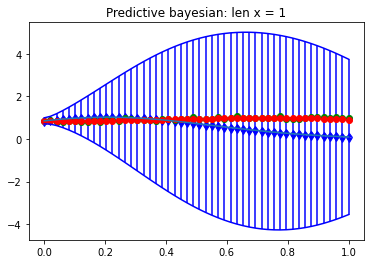

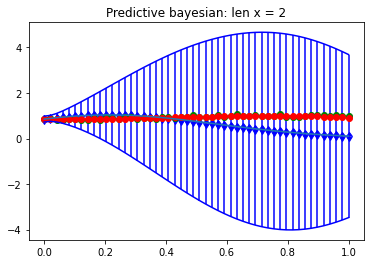

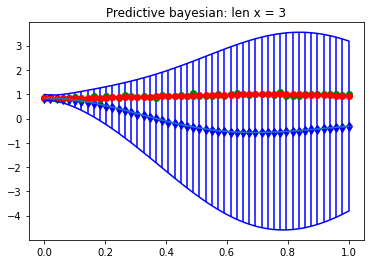

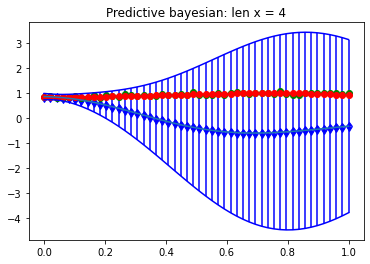

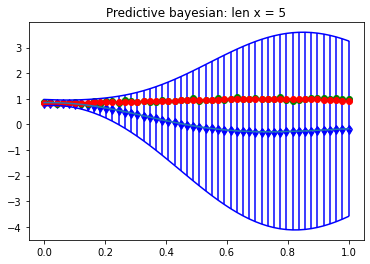

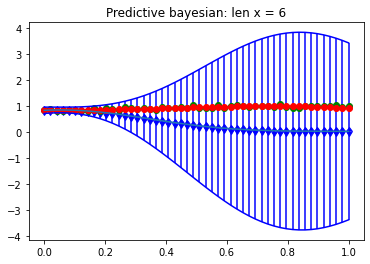

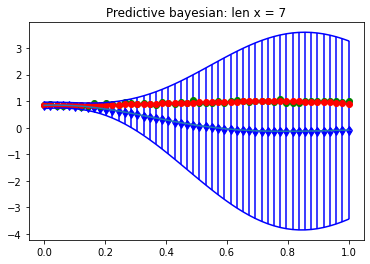

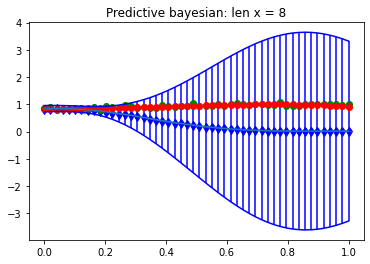

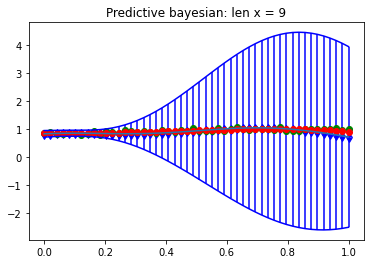

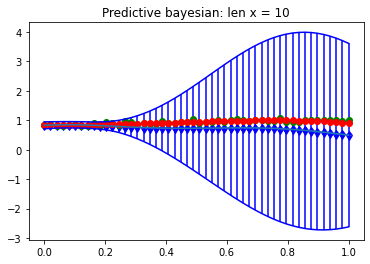

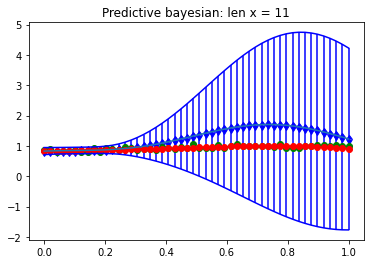

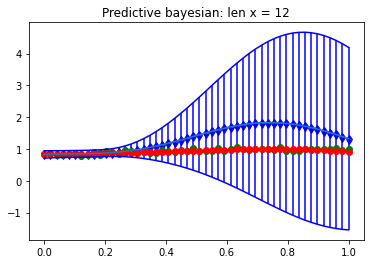

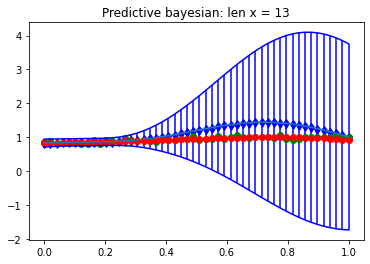

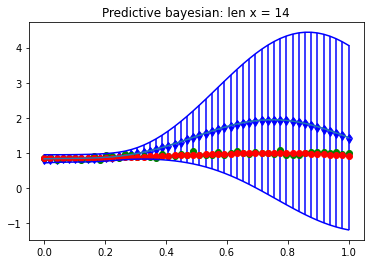

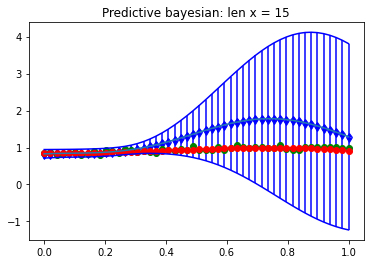

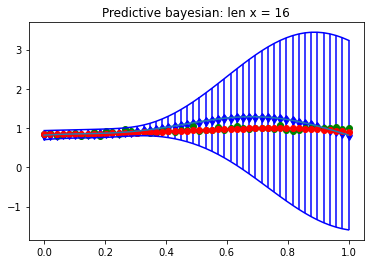

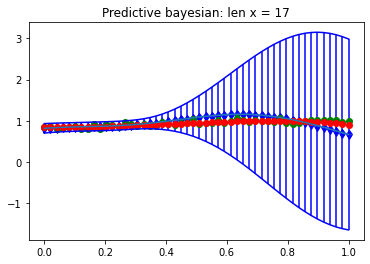

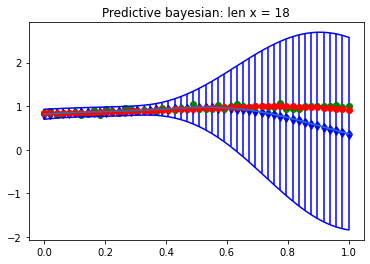

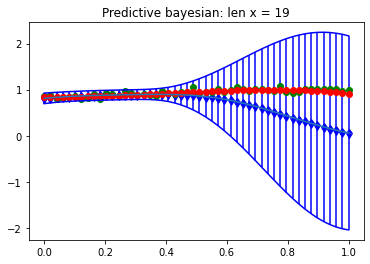

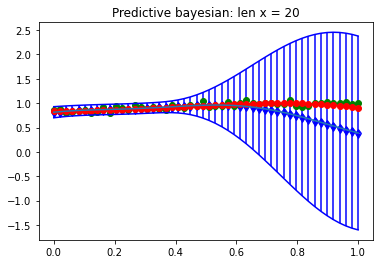

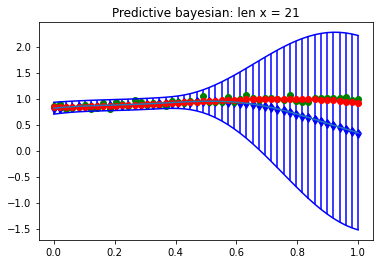

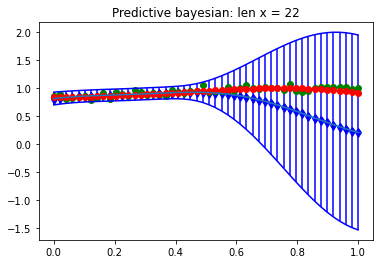

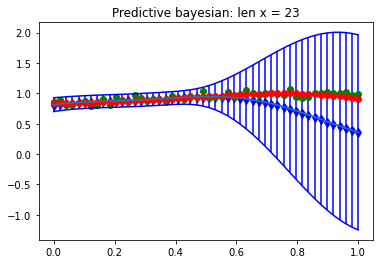

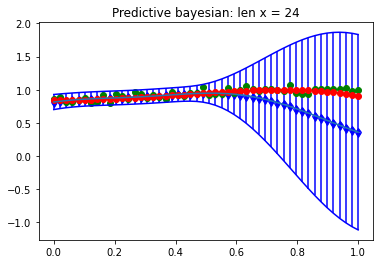

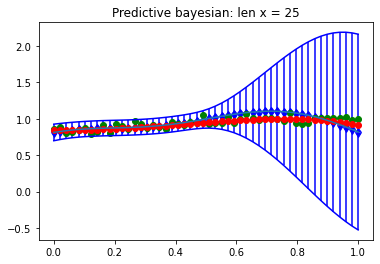

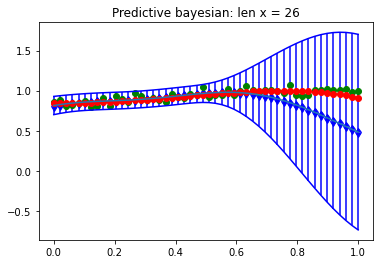

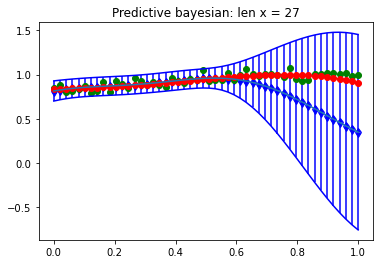

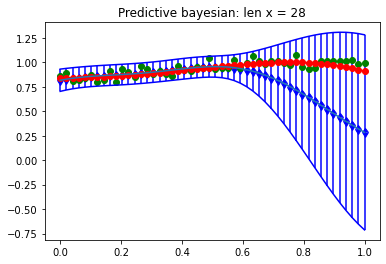

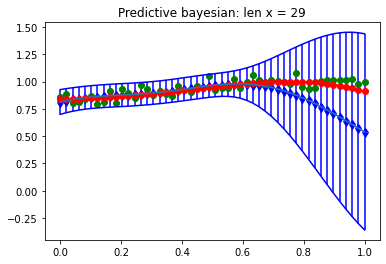

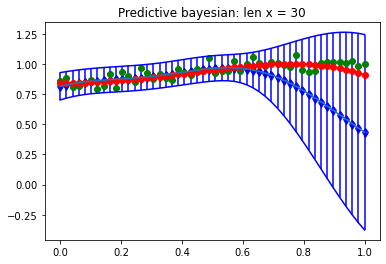

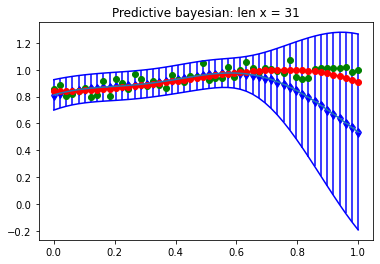

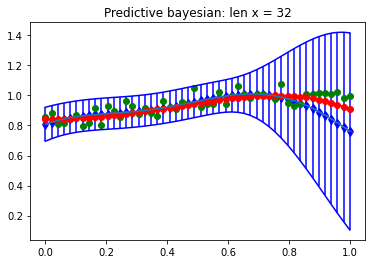

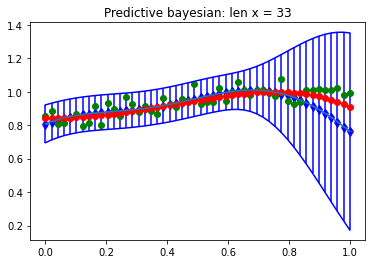

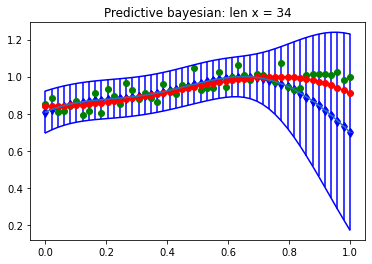

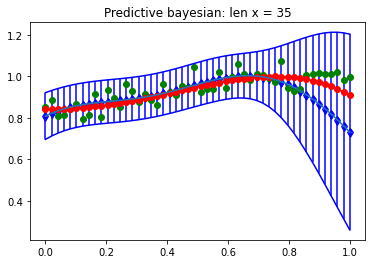

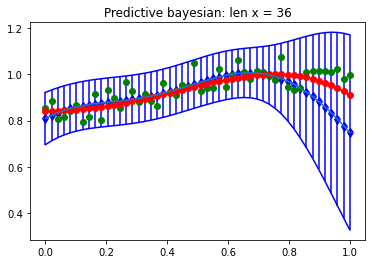

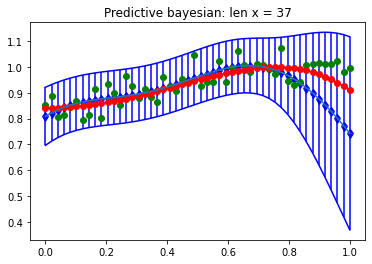

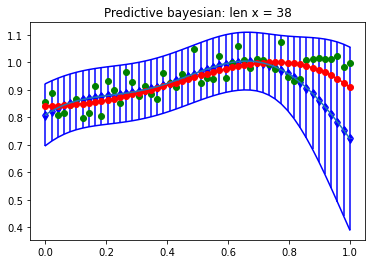

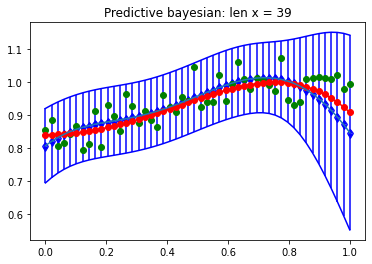

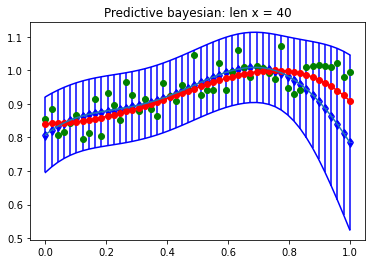

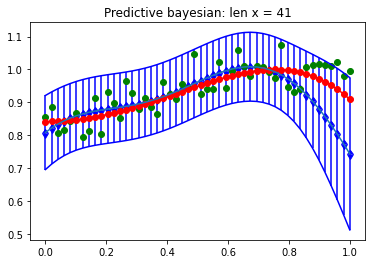

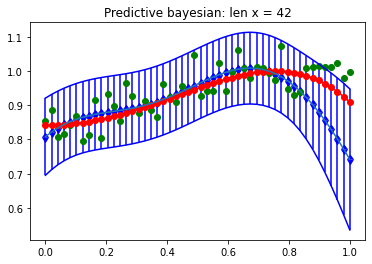

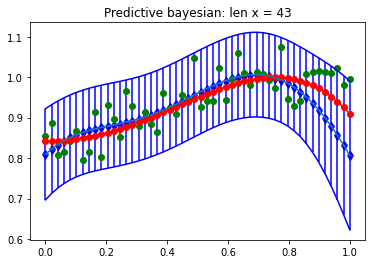

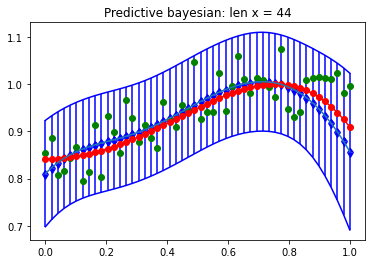

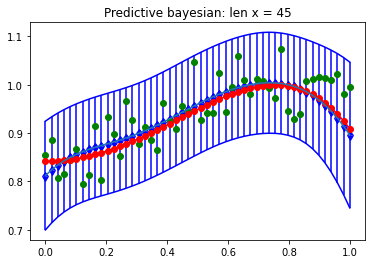

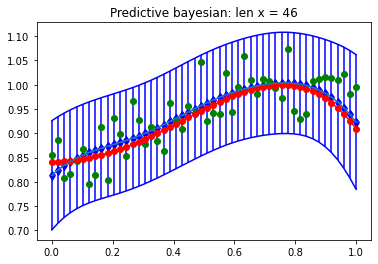

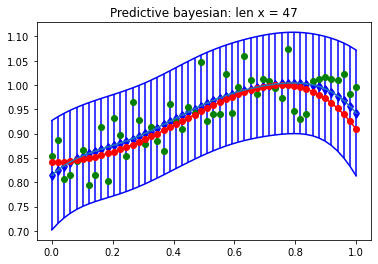

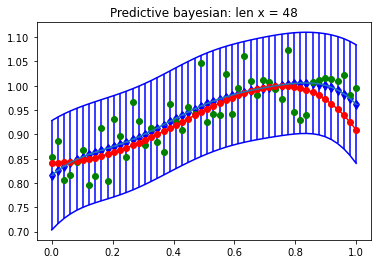

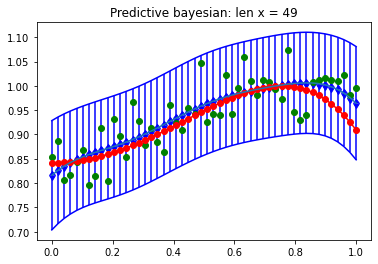

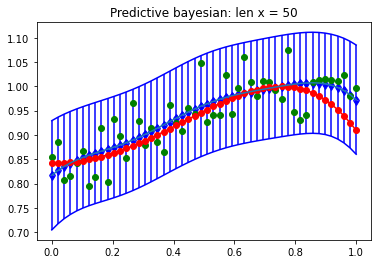

In [107]:
import random
for i in range(1,len(x_noise)+1):
    #my_list = list(x_noise)
    my_list = [i for i in range(1,len(x_noise)+1)]
    
    select_index = random.sample(my_list, i) 
    
    x_index = [x_noise[i] for i in range(len(select_index))]
    
    x_  = np.array(x_index)
    
    
    mu_list, sigma_list = my_full_Bayesian_predictive(x_select = x_, x = x_noise, y = y_noise, M = 50, alpha = 1 , beta = 100)
    
    fig = plt.figure()
    
    plt.errorbar(x_noise, mu_list[0] + sigma_list[0],yerr = sigma_list[0], uplims=True, color = 'b')

    plt.errorbar(x_noise, mu_list[0] - sigma_list[0], yerr = sigma_list[0], lolims=True,color = 'b')

    #plt.errorbar(x_noise, mu_list[0], uplims=upperlimits, lolims=lowerlimits,label='mean')
    plt.errorbar(x_noise, mu_list[0],label='mean')
    
    plt.plot(x_true,y_true,'r',x_true,y_noise,'go')
    plt.plot(x_true,y_true,'ro')
    plt.title('Predictive bayesian: len x = {}'.format(i))
    print(select_index)
  

**8.Explain why the predictive distribution is better than the original form of the full Bayesian inference.**


When the dataset is large, predictive distribution is more helpful because the data points are considered one at a time, and the model parameters updated after each such presentation. 

Predictive distribution is also appropriate for real-time applications in which the data observations are arriving in a continuous stream, and predictions must be made before all of the data points are seen. In this case, whether the data fit well is more visual than the original form of the full Bayesian inference.

**9.Discuss the differences between p(t_new|t) and p(w|t).**

p(t_new | t) = p(t_new | x_new, t, x, alpha ,beta) = ∫ p(t_new | w) * p(w|t) dw

p(t_new | t) is the probability of t_new given t, indicating the probability of the predicted t_new is.

p(w | t) is the probability of w given t, indicating the probability of the predicted parameter w is .

# Part 4: CLASSIFICATION USING FULL BAYESIAN + PREDICTIVE DISTRIBUTION

**1.This is an example code to generate classification data of two classes**

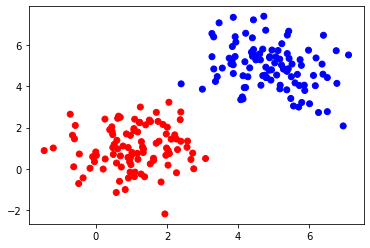

In [52]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
N1 = 100
N2 = 100
K = 2
sigma = 1.0

mean = (1,1)
cov = [[sigma,0],[0,sigma]]
X1 = np.random.multivariate_normal(mean, cov, N1)
c1 = ['red'] * len(X1)

mean = (5,5)
cov = [[sigma,0],[0,sigma]]
X2 = np.random.multivariate_normal(mean, cov, N2)
c2 = ['blue'] * len(X2)

X = np.concatenate((X1,X2))
color = np.concatenate((c1,c2))

T = 0 * np.ones([len(X),K])
for n in range(0,len(X)):
    if (n < len(X1)):
        T[n][0] = 1
    if (n >= N1 and n < len(X1) + len(X2)):
        T[n][1] = 1
T = T.astype(int)

plt.scatter(X[:,0], X[:,1], marker = 'o', c = color)
plt.show()

**2.Based on the code above, generate data similar to:**

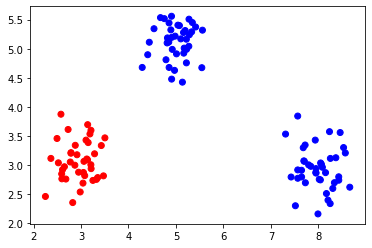

In [53]:
N1 = 40
N21 = 40
N22 = 40
K = 2
sigma = 0.1

mean = (3,3)
cov = [[sigma,0],[0,sigma]]
X1 = np.random.multivariate_normal(mean, cov, N1)
c1 = ['red'] * len(X1)

mean = (5,5)
cov = [[sigma,0],[0,sigma]]
X21 = np.random.multivariate_normal(mean, cov, N21)
c21 = ['blue'] * len(X21)

mean = (8,3)
cov = [[sigma,0],[0,sigma]]
X22 = np.random.multivariate_normal(mean, cov, N22)
c22 = ['blue'] * len(X22)
color = np.concatenate((c1,c21,c22))

X2 = np.concatenate((X21,X22))
X = np.concatenate((X1,X2))


T = 0 * np.ones([len(X),K])
for n in range(0,len(X)):
    if (n < len(X1)):
        T[n][0] = 1
    if (n >= N1 and n < len(X1) + len(X2)):
        T[n][1] = 1

T = T.astype(int)

plt.scatter(X[:,0], X[:,1],marker = 'o', c = color)
plt.show()

**3.Implement the predictive distribution, where the output is a decision whether a given point belongs to C1 or C2. Based in the generated data and your implementation, compute the probability map:**

In [208]:
import math
from scipy import linalg

def fi_classification_fun(xn, M, m, X):
    x_max = np.max(X)
    x_min = np.min(X)
    mu = np.linspace(x_min, x_max, M)
    sigma = 1
    x_1 = xn[0]
    x_2 = xn[1]
    item = - ((x_1 - mu[m]) ** 2 + (x_2 - mu[m]) ** 2 ) / (2 * (sigma ** 2))
    result = math.exp(item)
    return result


def sigmoid_classification_fun(w,fi_square, N):
    sigmoid_fun = np.zeros([N, 1])
    for i in range(N):
        a = np.dot(fi_square[i], w)
        item = 1/(1 + math.exp(-a))
        sigmoid_fun[i] = item
    return sigmoid_fun


def predictive_classification(X, T, M, alpha):
    N = len(X)
    t = np.zeros([N, 1])
    for i in range(N):
        t[i] = T[i][0]

    w = np.zeros([M, 1])
    S0_1 = np.zeros([M,M])
    row, col = np.diag_indices_from(S0_1)
    S0_1[row, col] = 1/alpha

    fi_square = np.zeros([N, M])
    for n in range(N):
        for m in range(M):
            fi_square[n][m] = fi_classification_fun(X[n], M, m, X)

    # newton
    while True:
        sig_fun = sigmoid_classification_fun(w, fi_square, N)
        R = np.zeros([N,N])
        for i in range(N):
            for j in range(N):
                if i == j:
                    R[i][j] = sig_fun[i] * (1 - sig_fun[i])


        E_l = np.dot(S0_1,w)
        dif = sig_fun - t
        E_r = np.dot(fi_square.T, dif)
        E = E_l + E_r

        H_rr = np.dot(fi_square.T,R)
        H_r = np.dot(H_rr,fi_square)
        H = S0_1 + H_r
        H_1 = linalg.inv(H)

        w_new = w - np.dot(H_1,E)
        if linalg.norm(w_new - w) <2e-3:
            w = w_new
            return w, H_1,fi_square
        else:
            w = w_new
        


In [55]:
def predictive_t(w, H_1, M, x_input, X):
    # Ptn
    fi_list = np.zeros([M,1])
    
    for m in range(M):
        fi_list[m][0] = fi_classification_fun(x_input, M, m, X)
    
    a_MAP = np.dot(w.T,fi_list) #fi list at input x
    fi = fi_list
    sigma_ = np.dot(fi.T, H_1)
    sigma = np.dot(sigma_ , fi)
    
    fenmu = math.sqrt( 1 + (np.pi * sigma)/8  )
    a = a_MAP / fenmu
    
    p_t = 1/ (1+ math.exp(-a))
    
    return p_t

In [69]:
N = len(X)
p_t_t = np.zeros([N,1])
for n in range(N):
    w,H_1,fi_square = predictive_classification(X,T,M = 3,alpha = 10)
    p_t =predictive_t(w,H_1, 3, X[n],X)
    p_t_t[n] = p_t

p_t_t
# 1 : red point
# 0 : blue point

array([[0.93699506],
       [0.91072174],
       [0.97900477],
       [0.8854128 ],
       [0.94369189],
       [0.87782703],
       [0.98453612],
       [0.94977883],
       [0.78253077],
       [0.97156476],
       [0.9774958 ],
       [0.97022513],
       [0.97431536],
       [0.81470898],
       [0.96620317],
       [0.95466008],
       [0.98648948],
       [0.93842678],
       [0.98107027],
       [0.93656444],
       [0.94312442],
       [0.93599942],
       [0.98511488],
       [0.82621691],
       [0.94823454],
       [0.96504034],
       [0.987715  ],
       [0.75397158],
       [0.96897122],
       [0.98191555],
       [0.99227775],
       [0.87608841],
       [0.95532589],
       [0.89275588],
       [0.92979277],
       [0.79955217],
       [0.95647413],
       [0.82035347],
       [0.978873  ],
       [0.93618413],
       [0.02288075],
       [0.02072606],
       [0.02193686],
       [0.02425732],
       [0.02081825],
       [0.02428361],
       [0.06060448],
       [0.021

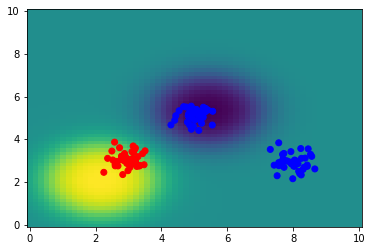

In [80]:
ix = np.linspace(0,10,60)
iy = np.linspace(0,10,60)
ic = np.zeros([60,60])
iX,iY=np.meshgrid(ix,iy)


x_single = np.zeros([1,2])
w,H_1,fi_square = predictive_classification(X,T,3,2)

for i in range(60):
    for j in range(60):
        x_single[0][0] = ix[i]
        x_single[0][1] = iy[j]
        pt_x = predictive_t(w, H_1, 3, x_single[0],X)
        ic[i][j] = pt_x
        
plt.pcolormesh(iX,iY,ic,edgecolors='face')  
plt.scatter(X[:,0], X[:,1],marker = 'o', c = color)   
plt.show()



**4.Ask the user to enter any new value of x, and your task is to provide the decision whether it belongs to C1 or C2, and its uncertainty information.**

In [81]:
# 1 : red point , C1
# 0 : blue point, C2
# input x : [x1,x2]

In [82]:
input_x1 =input()
input_x2 =input()

2
3


In [83]:
input_x = np.zeros([1,2])
input_x[0][0] = input_x1
input_x[0][1] = input_x2

In [85]:
pt_x = predictive_t(w, H_1, 3, input_x[0],X)
if pt_x > 0.5:
    print('this point belong to C1, its uncertainty is {}'.format(pt_x))
elif pt_x < 0.5:
    print('this point belong to C2, its uncertainty is {}'.format(1 - pt_x))
else:
    print('can not decide')

this point belong to C1, its uncertainty is 0.9400200151483895


The end at 2022.9.29 23:00